In [24]:
import sys
sys.path.append('..')

import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import shutil
import importlib

%matplotlib inline
from sklearn.datasets import load_files
import pandas as pd
pd.set_option("display.max_colwidth", 75)

In [25]:
# vgg19 fc layer train time
!cat ../vgg19/logs/fc_layer_train_caffe_vgg19.ps.log|cut -f8 -d,|tail -n +2\
|python -c 'import sys; vals=sys.stdin.readlines(); print(sum(map(float, vals))/len(vals))'

25948760.41230477


In [26]:
vgg19_fc = 25948760.41230477

In [27]:
# vgg19 all layer train time
!cat ../vgg19/logs/all_layer_train_caffe_vgg19.ps.log|cut -f8 -d,|tail -n +2\
|python -c 'import sys; vals=sys.stdin.readlines();print(sum(map(float, vals))/len(vals))'

26150894.894441318


In [28]:
vgg19_all = 26150894.894441318

In [29]:
# mobilenet fc layer train time
!cat ../mobilenet/logs/fc_layer_train_mobilenet.py.ps.log|cut -f8 -d,|tail -n +2\
|python -c 'import sys; vals=sys.stdin.readlines();print(sum(map(float, vals))/len(vals))'

19170925.678791013


In [30]:
mobilenet_fc = 19170925.678791013

In [31]:
# mobilenet all layer train time
!cat ../mobilenet/logs/all_layer_train_mobilenet.py.ps.log|cut -f8 -d,|tail -n +2\
|python -c 'import sys; vals=sys.stdin.readlines();print(sum(map(float, vals))/len(vals))'

24949300.608980563


In [32]:
mobilenet_all = 24949300.608980563

In [33]:
# inception fc layer train time
!cat ../inceptionresnetv2/logs/fc_layer_train_inceptionresnetv2.py.ps.log|cut -f8 -d,|tail -n +2\
|python -c 'import sys; vals=sys.stdin.readlines();print(sum(map(float, vals))/len(vals))'

19940900.443793826


In [34]:
inceptionresnetv2_fc = 19940900.443793826

In [35]:
# inception fc layer train time
!cat ../inceptionresnetv2/logs/all_layer_train_inceptionresnetv2.py.ps.log|cut -f8 -d,|tail -n +2\
|python -c 'import sys; vals=sys.stdin.readlines();print(sum(map(float, vals))/len(vals))'

26251220.16188511


In [36]:
inceptionresnetv2_all = 26251220.16188511


In [37]:
values = [vgg19_fc, vgg19_all, mobilenet_fc, mobilenet_all, inceptionresnetv2_fc,inceptionresnetv2_all]

In [38]:
min_value= min(values)

In [39]:
print([round(v/min_value, 3) for v in values])

[1.354, 1.364, 1.0, 1.301, 1.04, 1.369]


In [40]:
values

[25948760.41230477,
 26150894.894441318,
 19170925.678791013,
 24949300.608980563,
 19940900.443793826,
 26251220.16188511]

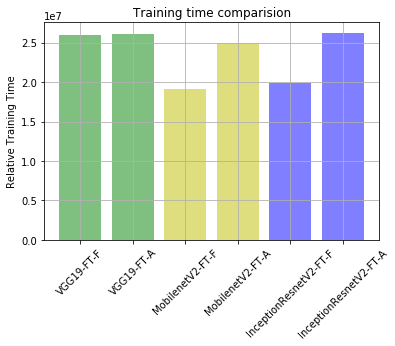

In [41]:
x_vals = ('VGG19-FT-F', 'VGG19-FT-A', 'MobilenetV2-FT-F', 'MobilenetV2-FT-A', 'InceptionResnetV2-FT-F', 'InceptionResnetV2-FT-A')
y_pos = np.arange(len(x_vals))

y_vals = values
colors = ['g', 'g', 'y', 'y', 'b', 'b']
plt.bar(y_pos, y_vals, align='center', alpha=0.5, color=colors)
plt.xticks(y_pos, x_vals, rotation=45)
plt.ylabel('Relative Training Time')
plt.title('Training time comparision')
plt.grid(True)
plt.show()
plt.savefig('../imgs/training_vsize_usage_comparision.png')